In [1]:
import os
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from numpy.random import choice

In [26]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
Sep_data2 = rio.open('/home/vdo/Downloads/September_2018_All_Tugs_Hours_Geographic.tif')

In [3]:
data = Sep_data2.read(1)

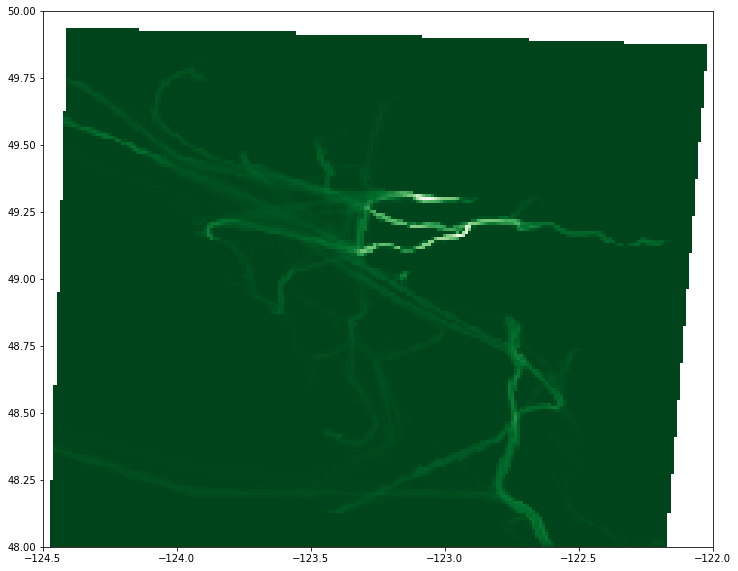

In [4]:
fig, ax = plt.subplots(figsize = (12,12))
show(Sep_data2, ax=ax, cmap = "Greens_r")
ax.set_xlim(-124.5, -122)
ax.set_ylim(48, 50);
#fig.savefig("/home/vdo/Pictures/tif_file.png", bbox_inches='tight');

In [5]:
data.shape

(270, 589)

In [6]:
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

In [7]:
data[data<0] = 0

In [8]:
probability_distribution = data/data.sum()
probability_distribution2 = probability_distribution/probability_distribution.sum()

In [9]:
probability_distribution2.sum()

1.0

In [10]:
probability_distribution2.shape

(270, 589)

In [11]:
latlon = np.zeros((270,589), dtype=(float,2))
latlontxt = np.chararray((270,589), itemsize = 20)
for y in range(589):
    for x in range(270):
        x2, y2 = Sep_data2.transform * (y,x)
        latlon[x,y] = Sep_data2.transform * (y,x)
        latlontxt[x,y] = "lat" + str(truncate(x2,3)) + "lon" + str(truncate(y2,3))

In [12]:
choice(latlontxt.reshape(-1) ,p=probability_distribution2.reshape(-1))

b'lat-123.292lon49.293'

In [13]:
choice(latlontxt.reshape(-1) ,p=probability_distribution2.reshape(-1))

b'lat-123.624lon48.984'

In [14]:
a = choice(latlontxt.reshape(-1),size = 10000 ,p=probability_distribution2.reshape(-1))

In [15]:
a.shape

(10000,)

In [16]:
lats = np.array([])
lons = np.array([])

for i in a:
    lats = np.append(lats, float(i[3:11]))
    lons = np.append(lons, float(i[14:]))

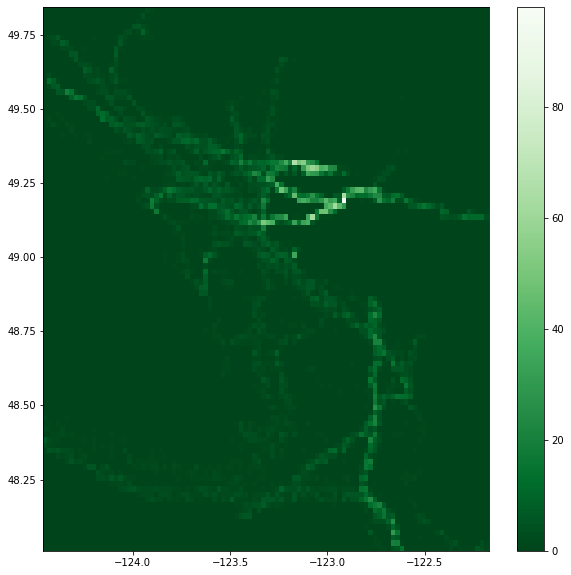

In [24]:
fig, ax = plt.subplots(figsize = (10,10))

h = ax.hist2d(lats, lons, bins=100, cmap = "Greens_r");
plt.colorbar(h[3], ax=ax);
#ax.set_xlim(-124.5, -122)
#ax.set_ylim(48, 50);

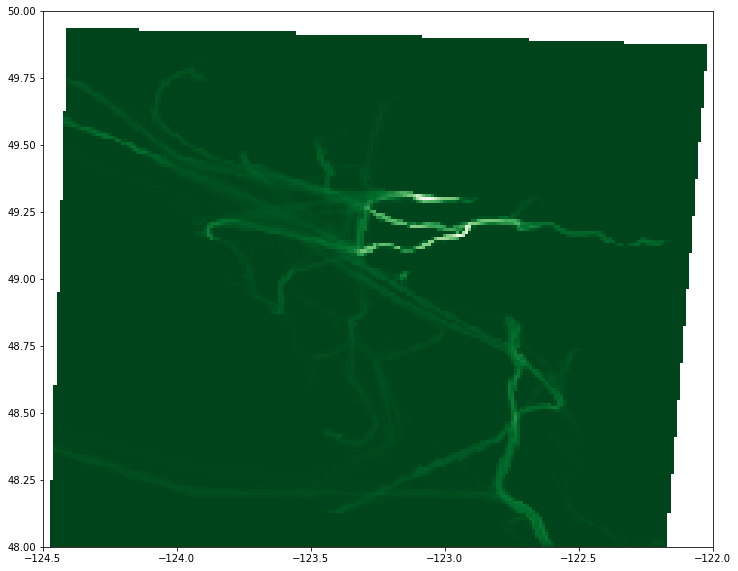

In [25]:
fig, ax = plt.subplots(figsize = (12,12))
show(Sep_data2, ax=ax, cmap = "Greens_r")
ax.set_xlim(-124.5, -122)
ax.set_ylim(48, 50);